In [3]:
%config IPCompleter.greedy=True

In [60]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd

In [61]:
cricket=pd.read_csv('Cricket.csv', encoding="ISO-8859-1")
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [62]:
df=cricket[['Player','SR','Ave']]
df.shape

(79, 3)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
numeric_df=df.copy()
s_scalar=StandardScaler(copy=True)
numeric_df[['SR','Ave']]=s_scalar.fit_transform(numeric_df[['SR','Ave']])
numeric_df


,Player,SR,Ave
0,SR Tendulkar (INDIA),0.703152,1.072294
1,KC Sangakkara (Asia/ICC/SL),-0.044139,0.587725
2,RT Ponting (AUS/ICC),0.110997,0.596226
3,ST Jayasuriya (Asia/SL),1.207091,-1.047909
4,DPMD Jayawardene (Asia/SL),-0.034000,-0.876185
5,Inzamam-ul-Haq (Asia/PAK),-0.512591,0.169465
6,JH Kallis (Afr/ICC/SA),-0.649476,0.992383
7,SC Ganguly (Asia/INDIA),-0.567345,0.424501
8,R Dravid (Asia/ICC/INDIA),-0.816780,0.108256
9,BC Lara (ICC/WI),0.021768,0.332688


In [93]:
kmeans = KMeans(n_clusters=4,random_state=100).fit(numeric_df[['SR','Ave']])

In [94]:
kmeans.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1, 2,
       1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2, 2, 2,
       1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 0, 2])

In [95]:
cricket_cluster = pd.concat([numeric_df, pd.Series(kmeans.labels_)], axis=1)

In [96]:
cricket_cluster.rename(columns={0:'cluster_id'},inplace=True)

In [98]:
cricket_cluster[cricket_cluster['cluster_id']==0]

,Player,SR,Ave,cluster_id
3,ST Jayasuriya (Asia/SL),1.207091,-1.047909,0
10,TM Dilshan (SL),0.703152,0.126959,0
12,AC Gilchrist (AUS/ICC),1.789106,-0.447724,0
17,CH Gayle (ICC/WI),0.589588,-0.202889,0
20,Yuvraj Singh (Asia/INDIA),0.849162,-0.335508,0
24,V Sehwag (Asia/ICC/INDIA),2.538425,-0.590544,0
27,Shahid Afridi (Asia/ICC/PAK),3.823117,-2.542423,0
50,BB McCullum (NZ),1.731310,-1.379457,0
57,EJG Morgan (ENG/IRE),0.945489,0.035146,0
59,SR Watson (AUS),1.130030,0.342890,0


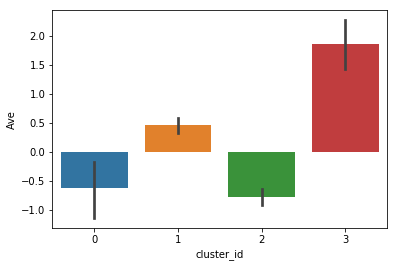

In [69]:
%matplotlib inline
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster.Ave)

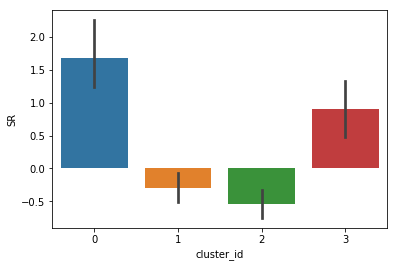

In [70]:
sns.barplot(x=cricket_cluster.cluster_id, y=cricket_cluster.SR)

In [74]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import matplotlib.pyplot as plt

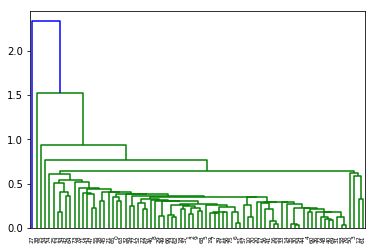

In [100]:
mergings = linkage(numeric_df[['SR','Ave']], method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

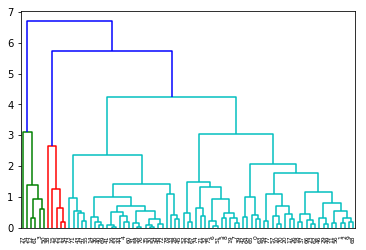

In [101]:
mergings = linkage(numeric_df[['SR','Ave']], method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [135]:
clusterCut_TT = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
cricket_cluster_cut = pd.concat([numeric_df, clusterCut_TT], axis=1)
#RFM_hc.columns = ['CustomerID', 'Frequency', 'Amount', 'Recency', 'ClusterID']
print("0 :",cricket_cluster_cut[cricket_cluster_cut[0]==0].SR.mean())
print("1 :",cricket_cluster_cut[cricket_cluster_cut[0]==1].SR.mean())
print("2 :",cricket_cluster_cut[cricket_cluster_cut[0]==2].SR.mean())
print("3 :",cricket_cluster_cut[cricket_cluster_cut[0]==3].SR.mean())

0 : -0.09414520193709461
1 : 2.092619362858175
2 : -0.49730602356668013
3 : 0.9462999477144514


In [134]:
cricket_cluster_cut[cricket_cluster_cut[0]==0]

,Player,SR,Ave,0
0,SR Tendulkar (INDIA),0.703152,1.072294,0
1,KC Sangakkara (Asia/ICC/SL),-0.044139,0.587725,0
2,RT Ponting (AUS/ICC),0.110997,0.596226,0
5,Inzamam-ul-Haq (Asia/PAK),-0.512591,0.169465,0
6,JH Kallis (Afr/ICC/SA),-0.649476,0.992383,0
7,SC Ganguly (Asia/INDIA),-0.567345,0.424501,0
8,R Dravid (Asia/ICC/INDIA),-0.816780,0.108256,0
9,BC Lara (ICC/WI),0.021768,0.332688,0
10,TM Dilshan (SL),0.703152,0.126959,0
11,Mohammad Yousuf (Asia/PAK),-0.425390,0.541818,0


In [106]:
clusterCut_t = cut_tree(mergings, n_clusters = 4)


In [113]:
ClusterID=pd.Series(clusterCut_t.reshape(-1,))
cricket_cluster_merge = pd.concat([numeric_df, ClusterID], axis=1)

In [125]:
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==1]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==2]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==3]))
print(len(cricket_cluster_cut[cricket_cluster_cut[0]==0]))

6
27
5
41
